In [6]:
import helpful_methods as hm
import sqlalchemy
import pandas as pd
import talib
# from ipywidgets import widgets
import ipywidgets as widgets

import mplfinance as mpf
from patterns import patterns


ModuleNotFoundError: No module named 'helpful_methods'

In [5]:
engine = sqlalchemy.create_engine(hm.database_connection_string)
inspector = sqlalchemy.inspect(engine)
# print(engine)
db_table_names = inspector.get_table_names()
print(db_table_names)


NameError: name 'hm' is not defined

In [3]:
portfolio_list = []
for table in db_table_names:
    portfolio_list.append(hm.gen_df(table, engine))

print(portfolio_list)

[                        Close      High       Low      Open Status  Volume
Time                                                                      
2021-08-30 03:58:00  105.4700  105.4700  105.4700  105.4700     ok     200
2021-08-30 06:00:00  105.3500  105.4500  105.3500  105.4500     ok     355
2021-08-30 06:17:00  105.2100  105.2100  105.2100  105.2100     ok     127
2021-08-30 06:24:00  105.3800  105.3800  105.2100  105.2100     ok    1648
2021-08-30 06:40:00  105.3800  105.3800  105.3800  105.3800     ok     150
...                       ...       ...       ...       ...    ...     ...
2021-09-28 16:09:00  102.0400  102.0400  102.0300  102.0300     ok     225
2021-09-28 16:26:00  102.0400  102.0400  102.0400  102.0400     ok     300
2021-09-28 16:44:00  102.0400  102.0500  102.0400  102.0500     ok     401
2021-09-28 17:11:00  102.0401  102.0401  102.0401  102.0401     ok     180
2021-09-28 17:41:00  102.0500  102.0500  102.0500  102.0500     ok      90

[8707 rows x 6 columns]

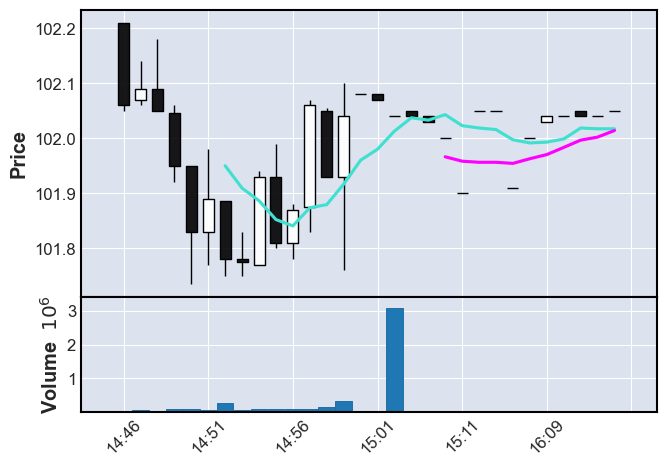

In [4]:
plot_slice = portfolio_list[0].iloc[-30:]
candle_plot, ax = mpf.plot(
    # portfolio_list[0], 
    plot_slice, 
    type='candle', 
    volume=True, 
    returnfig=True,
    mav=(7,20),
    )


In [5]:
df = portfolio_list[0]
pattern_list = []

for pattern, p_name in patterns.items():
    pattern_list.append(pattern)
# print(pattern_list)

In [6]:
# vals = ['km', 'm', 'cm','mm']
sel = widgets.SelectMultiple(
        options=pattern_list,
        # value=['m'],
        rows=min(5, len(pattern_list)),
        description='Unit:'
    )
display(sel)
# in a diffrent cell
# sel.value
# (‘m’,)

SelectMultiple(description='Unit:', options=('CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'C…

In [16]:
print(sel.value, type(list(sel.value)))
candle_col_list = ['Open', 'High', 'Low', 'Close', 'Volume']
print(list(sel.value))
print(df[candle_col_list + list(sel.value)])


('CDL2CROWS', 'CDL3OUTSIDE', 'CDLADVANCEBLOCK', 'CDLDARKCLOUDCOVER') <class 'list'>
['CDL2CROWS', 'CDL3OUTSIDE', 'CDLADVANCEBLOCK', 'CDLDARKCLOUDCOVER']
                         Open      High       Low     Close  Volume  \
Time                                                                  
2021-08-30 03:58:00  105.4700  105.4700  105.4700  105.4700     200   
2021-08-30 06:00:00  105.4500  105.4500  105.3500  105.3500     355   
2021-08-30 06:17:00  105.2100  105.2100  105.2100  105.2100     127   
2021-08-30 06:24:00  105.2100  105.3800  105.2100  105.3800    1648   
2021-08-30 06:40:00  105.3800  105.3800  105.3800  105.3800     150   
...                       ...       ...       ...       ...     ...   
2021-09-28 16:09:00  102.0300  102.0400  102.0300  102.0400     225   
2021-09-28 16:26:00  102.0400  102.0400  102.0400  102.0400     300   
2021-09-28 16:44:00  102.0500  102.0500  102.0400  102.0400     401   
2021-09-28 17:11:00  102.0401  102.0401  102.0401  102.0401     18

In [15]:
# pattern = pattern_list[6]
df_user = df
for pattern in list(sel.value):
    pattern_function = getattr(talib, pattern)
    try:
        result = pattern_function(df['Open'], df['High'], df['Low'], df['Close'])
        df_user[pattern] = result

        # print(result)
        last = result.tail(1).values[0]
        if last > 0:
            print(f'Bullish {pattern}')
            # df[symbol][pattern] = 'bullish'
        elif last < 0:
            print(f'Bearish {pattern}')
            # df[symbol][pattern] = 'bearish'
        else:
            pass
            # print(f'None  {pattern}')
            # df[symbol][pattern] = None
        
    except:
        pass

print(df_user.tail())


['CDL2CROWS', 'CDL3OUTSIDE', 'CDLADVANCEBLOCK', 'CDLDARKCLOUDCOVER']
                         Open      High       Low     Close  Volume  \
Time                                                                  
2021-08-30 03:58:00  105.4700  105.4700  105.4700  105.4700     200   
2021-08-30 06:00:00  105.4500  105.4500  105.3500  105.3500     355   
2021-08-30 06:17:00  105.2100  105.2100  105.2100  105.2100     127   
2021-08-30 06:24:00  105.2100  105.3800  105.2100  105.3800    1648   
2021-08-30 06:40:00  105.3800  105.3800  105.3800  105.3800     150   
...                       ...       ...       ...       ...     ...   
2021-09-28 16:09:00  102.0300  102.0400  102.0300  102.0400     225   
2021-09-28 16:26:00  102.0400  102.0400  102.0400  102.0400     300   
2021-09-28 16:44:00  102.0500  102.0500  102.0400  102.0400     401   
2021-09-28 17:11:00  102.0401  102.0401  102.0401  102.0401     180   
2021-09-28 17:41:00  102.0500  102.0500  102.0500  102.0500      90   

       

In [9]:
df_all_signals = df
for pattern in pattern_list:
# for pattern in list(sel.value):
    pattern_function = getattr(talib, pattern)
    try:
        result = pattern_function(df['Open'], df['High'], df['Low'], df['Close'])
        df_all_signals[pattern] = result

        # print(result)
        last = result.tail(1).values[0]
        if last > 0:
            print(f'Bullish {pattern}')
            # df[symbol][pattern] = 'bullish'
        elif last < 0:
            print(f'Bearish {pattern}')
            # df[symbol][pattern] = 'bearish'
        else:
            pass
            # print(f'None  {pattern}')
            # df[symbol][pattern] = None
        
    except:
        pass

print(df_all_signals.tail())



Bullish CDLDOJI
Bearish CDLHIKKAKE
                        Close      High       Low      Open Status  Volume  \
Time                                                                         
2021-09-28 16:09:00  102.0400  102.0400  102.0300  102.0300     ok     225   
2021-09-28 16:26:00  102.0400  102.0400  102.0400  102.0400     ok     300   
2021-09-28 16:44:00  102.0400  102.0500  102.0400  102.0500     ok     401   
2021-09-28 17:11:00  102.0401  102.0401  102.0401  102.0401     ok     180   
2021-09-28 17:41:00  102.0500  102.0500  102.0500  102.0500     ok      90   

                     CDL2CROWS  CDL3BLACKCROWS  CDL3INSIDE  CDL3LINESTRIKE  \
Time                                                                         
2021-09-28 16:09:00          0               0           0               0   
2021-09-28 16:26:00          0               0           0               0   
2021-09-28 16:44:00          0               0           0               0   
2021-09-28 17:11:00         